# Investment Assignment 
#### by Ayush Mandowara

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data to Dataframes

In [2]:
companies = pd.read_csv('companies.csv')
rounds2 = pd.read_csv('rounds2.csv')

## Understanding the Data

In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


## Feature Extraction
- We will choose the required columns for analysis and drop the rest

### In companies dataframe, the columns of interest are
- permalink
- category_list
- country_code

Dropping the rest

In [5]:
companies_df = companies.drop(['name', 'homepage_url', 'status', 'state_code', 'region', 'city', 'founded_at'], axis=1)
#companies_df.head()

In [6]:
companies_df.permalink.apply(lambda x: str(x).lower()).describe()

count                     66368
unique                    66368
top       /organization/maxcart
freq                          1
Name: permalink, dtype: object

In [7]:
companies_df.describe()

,permalink,category_list,country_code
count,66368,63220,59410
unique,66368,27296,137
top,/Organization/Grid20-20,Software,USA
freq,1,3995,37601


### In rounds2 dataframe, the columns of interest are
- company_permalink
- funding_round_type
- funding_round_code
- raised_amount_usd

Dropping the rest

In [8]:
rounds2_df = rounds2.drop(['funding_round_permalink', 'funded_at'], axis=1)
#rounds2_df.head()

In [9]:
rounds2_df.company_permalink.apply(lambda x: str(x).lower()).describe()

count                       114949
unique                       66373
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

### Null Value Analysis - rounds2

In [10]:
rounds2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   company_permalink   114949 non-null  object 
 1   funding_round_type  114949 non-null  object 
 2   funding_round_code  31140 non-null   object 
 3   raised_amount_usd   94959 non-null   float64
dtypes: float64(1), object(3)
memory usage: 3.5+ MB


In [11]:
# percentage of missing value in raised_amount_usd
round(sum(rounds2_df.raised_amount_usd.isnull())/len(rounds2_df)*100, 2)

17.39

In [12]:
# percentage of missing value in funding_round_code
round(sum(rounds2_df.funding_round_code.isnull())/len(rounds2_df)*100, 2)

72.91

As per the above analysis, we find that
- there are 114949 entries in the dataframe
- no missing values in company_permalink
- no missing values in funding_round_type
- funding_round_code has ~73% missing values
- raised_amount_usd has ~17% missing values

### Treating missing values - rounds2

##### As more than 70% data is missing in `funding_round_code`, we will drop this column from the dataset

In [13]:
rounds2_df_treated = rounds2_df.drop(['funding_round_code'], axis=1)
# rounds2_df_treated.head()

In [14]:
rounds2_df_treated.head()

,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,venture,10000000.0
1,/ORGANIZATION/-QOUNTER,venture,NaN
2,/organization/-qounter,seed,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,venture,3406878.0
4,/organization/0-6-com,venture,2000000.0


##### Raised amount USD is an important feature and has about 17% missing values, hence we should fill the missing values

In [15]:
rounds2_df_treated.raised_amount_usd.describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

<a id='raised_amount_usd_boxplot'></a>


### Boxplot to perform outlier analysis for `raised_amount_usd` column

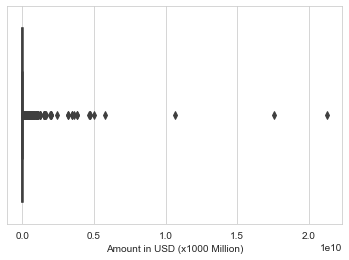

In [16]:
sns.set_style("whitegrid")
amount_box_plot = sns.boxplot(x = 'raised_amount_usd', data=rounds2_df_treated)
amount_box_plot.set(xlabel='Amount in USD (x1000 Million)')
plt.show()

As we can see from the plot above, 
- there are outliers in the dataset to the far right (top most values)
- moreover, a lot of values are NaN (i.e. missing)  

We will remove these values for better visualization.  
To remove, we will select all values below the 95th percentile

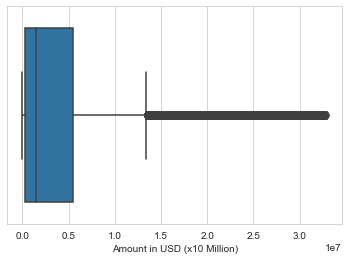

In [17]:
rounds2_df_outlier_removed = rounds2_df_treated[rounds2_df_treated.raised_amount_usd < rounds2_df_treated.raised_amount_usd.quantile(q=0.95)]
amount_box_plot = sns.boxplot(x = 'raised_amount_usd', data=rounds2_df_outlier_removed)
amount_box_plot.set(xlabel='Amount in USD (x10 Million)')
plt.show()

In [18]:
rounds2_df_outlier_removed.describe()

,raised_amount_usd
count,9.016400e+04
mean,4.373364e+06
std,6.419298e+06
min,0.000000e+00
25%,3.000000e+05
50%,1.500000e+06
75%,5.527561e+06
max,3.293696e+07


After removing outliers, (& NaN values, as that is default behavior of quantile selection in pandas [see #1](https://stackoverflow.com/a/24047916))
- The mean has come down significantly (from 10 Million, to 4.3 Million)
- The boxplot is plotted such that we can see that the median is somewhere in 1-2 million (near to 1.5 Million), which is what we saw earlier as well
- There are many values above the upper-fence, however, they concentrated and form a line, so these values are acc

##### Given this information, it is clear that median will be a better approximation for filling missing values

#### Note: We aren't removing outliers from the dataset, the above process was followed for visualization only

Further, we try to find median for each type of funding

In [19]:
# Pivot Table to see median grouped by funding_round_type
rounds2_df_treated.pivot_table(
    index = 'funding_round_type',
    values = 'raised_amount_usd',
    aggfunc = 'median'
)

,raised_amount_usd
funding_round_type,
angel,400000.0
convertible_note,272000.0
debt_financing,1100000.0
equity_crowdfunding,100000.0
grant,201684.0
non_equity_assistance,60000.0
post_ipo_debt,19950000.0
post_ipo_equity,12262852.5
private_equity,20000000.0


We are choosing to fill missing values based on round_type, instead of the general median, since the raised amount is directly linked with what type of round it is.

In [20]:
rounds2_df_treated.raised_amount_usd = rounds2_df_treated.raised_amount_usd.fillna(rounds2_df_treated.groupby('funding_round_type').raised_amount_usd.transform('median'))
# rounds2_df_treated.head()

#### rounds2 missing values treated

In [21]:
rounds2_df_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   company_permalink   114949 non-null  object 
 1   funding_round_type  114949 non-null  object 
 2   raised_amount_usd   114949 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.6+ MB


In [22]:
# converting company_permalink to lowercase
rounds2_df_treated.company_permalink = rounds2_df_treated.company_permalink.apply(lambda x: str(x).lower())

In [23]:
rounds2_df_treated.company_permalink.describe()

count                       114949
unique                       66373
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

### Null Value Analysis - Companies

In [24]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   category_list  63220 non-null  object
 2   country_code   59410 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


In [25]:
# percentage of missing value in category_list
round(sum(companies_df.category_list.isnull())/len(companies_df)*100, 2)

4.74

In [26]:
# percentage of missing value in country_code
round(sum(companies_df.country_code.isnull())/len(companies_df)*100, 2)

10.48

As per the above analysis, we find that
- there are 66368 entries in the dataframe
- no missing values in permalink
- category_list has ~5% missing values
- country_code has ~10% missing values

### Treating missing values - companies

##### As 5% data is missing in category_list, we can choose the most prominent category (mode) and fill the missing values with it. 
- Filling Mode for NaN values [see #2](https://stackoverflow.com/a/42789818/7048915)

In [27]:
companies_df.category_list.mode()[0]

'Software'

In [28]:
companies_df_treated = companies_df.copy()

In [29]:
companies_df_treated.category_list = companies_df_treated.category_list.fillna(companies_df_treated.category_list.mode()[0])
#companies_df_treated.head()

In [30]:
#companies_df[companies_df.category_list.isnull()]

In [31]:
companies_df_treated[companies_df_treated.category_list.isnull()]

,permalink,category_list,country_code


##### As 10% data is missing from country_code, we are choosing to fill it with this with the mode (most prominent value) of this column.

In [32]:
companies_df_treated.country_code.mode()[0]

'USA'

In [33]:
companies_df_treated.country_code = companies_df_treated.country_code.fillna(companies_df_treated.country_code.mode()[0])
# companies_df.head()

#### companies missing values treated

In [34]:
companies_df_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   category_list  66368 non-null  object
 2   country_code   66368 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


In [35]:
# converting company_permalink to lowercase
companies_df_treated.permalink = companies_df_treated.permalink.apply(lambda x: str(x).lower())
companies_df_treated.head()

,permalink,category_list,country_code
0,/organization/-fame,Media,IND
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-the-one-of-them-inc-,Apps|Games|Mobile,USA
3,/organization/0-6-com,Curated Web,CHN
4,/organization/004-technologies,Software,USA


### Permalink Anlysis - rounds2 vs companies

In [36]:
rounds2_df_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   company_permalink   114949 non-null  object 
 1   funding_round_type  114949 non-null  object 
 2   raised_amount_usd   114949 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.6+ MB


In [37]:
rounds2_df_treated.company_permalink.describe()

count                       114949
unique                       66373
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [38]:
companies_df_treated.permalink.describe()

count                     66368
unique                    66368
top       /organization/maxcart
freq                          1
Name: permalink, dtype: object

In [39]:
set(rounds2_df_treated.company_permalink) - set(companies_df_treated.permalink)

{'/organization/affluent-attaché-club-2',
 '/organization/asiansbook\x84�',
 '/organization/boréal-bikes-incorporated',
 '/organization/bricoprivé-com',
 '/organization/capptú',
 '/organization/crème-ciseaux',
 '/organization/e-cêbica',
 '/organization/energystone-games-ǁ�ǟ�ƹ�ƈ�',
 '/organization/etool-io\x94',
 '/organization/gráfica-en-línea',
 '/organization/huizuche-com-惠��车',
 '/organization/ignia-bienes-raíces',
 '/organization/inveno-英威诺',
 '/organization/iproof---the-foundation-for-the-internet-of-things\x84�',
 '/organization/it\x80�s-all-about-me',
 '/organization/jean-pütz-produkte',
 '/organization/jiwu-吉屋网',
 '/organization/know\x80�n\x80�act',
 '/organization/k��k',
 '/organization/lawpàdí',
 '/organization/magnet-tech-ǣ�ǟ�ǧ�ɗ�',
 '/organization/magnet-tech-磁���科暀',
 '/organization/monnier-frères',
 '/organization/médica-santa-carmen-2',
 '/organization/patrofi̇n',
 '/organization/proděti-cz',
 '/organization/prześwietl-pl',
 '/organization/salão-vip',
 '/organization/tal

##### Remove non Ascii Characters from permalink - [see #4](https://stackoverflow.com/a/56744855/7048915)

In [40]:
companies_df_treated.permalink = companies_df_treated['permalink'].str.encode('ascii', 'ignore').str.decode('ascii')
companies_df_treated.head()

,permalink,category_list,country_code
0,/organization/-fame,Media,IND
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-the-one-of-them-inc-,Apps|Games|Mobile,USA
3,/organization/0-6-com,Curated Web,CHN
4,/organization/004-technologies,Software,USA


In [41]:
rounds2_df_treated['company_permalink'] = rounds2_df_treated['company_permalink'].str.encode('ascii', 'ignore').str.decode('ascii')
rounds2_df_treated.head()

,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,venture,10000000.0
1,/organization/-qounter,venture,5000000.0
2,/organization/-qounter,seed,700000.0
3,/organization/-the-one-of-them-inc-,venture,3406878.0
4,/organization/0-6-com,venture,2000000.0


In [42]:
set(rounds2_df_treated['company_permalink']) - set(companies_df_treated['permalink'])

{'/organization/novatiff-reklam-ve-tantm-hizmetleri-tic',
 '/organization/patrofin'}

In [43]:
set(companies_df_treated['permalink']) - set(rounds2_df_treated['company_permalink'])

{'/organization/inovatiff-reklam-ve-tantm-hizmetleri-tic',
 '/organization/patrofn'}

##### Partial Match to verify if strings are same - [see #3](https://stackoverflow.com/a/56744855/7048915)

In [44]:
companies_df[companies_df['permalink'].str.contains('/Organization/Patro')]

,permalink,category_list,country_code
42529,/Organization/Patrof�N,Software,TUR
42530,/Organization/Patron-Technology,Art|CRM|Enterprise Software|Music|Sports|Techn...,USA
42531,/Organization/Patronpath,Software,USA
42532,/Organization/Patronus-Medical,Medical,USA


In [45]:
companies_df_treated[companies_df_treated['permalink'].str.contains('/organization/patro')]

,permalink,category_list,country_code
42529,/organization/patrofn,Software,TUR
42530,/organization/patron-technology,Art|CRM|Enterprise Software|Music|Sports|Techn...,USA
42531,/organization/patronpath,Software,USA
42532,/organization/patronus-medical,Medical,USA


In [46]:
rounds2_df_treated[rounds2_df_treated['company_permalink'].str.contains('/organization/patro')]

,company_permalink,funding_round_type,raised_amount_usd
73633,/organization/patrofin,grant,42607.0
73634,/organization/patron-technology,angel,2500000.0
73635,/organization/patron-technology,debt_financing,600000.0
73636,/organization/patronpath,venture,700000.0
73637,/organization/patronus-medical,venture,1000000.0


In [47]:
companies_df_treated[companies_df_treated['permalink'].str.contains('reklam')]['permalink'][66367]

'/organization/inovatiff-reklam-ve-tantm-hizmetleri-tic'

In [48]:
rounds2_df_treated[rounds2_df_treated['company_permalink'].str.contains('reklam')]['company_permalink'][114948]

'/organization/novatiff-reklam-ve-tantm-hizmetleri-tic'

We can see that the permalinks are for same company, but character 'i' is encoded a bit differently in rounds2. 
We will fix these 2 entries manually

In [49]:
rounds2_df_treated.loc[[114948], 'company_permalink'] = '/organization/inovatiff-reklam-ve-tantm-hizmetleri-tic'
rounds2_df_treated[rounds2_df_treated['company_permalink'].str.contains('reklam')]['company_permalink'][114948]

'/organization/inovatiff-reklam-ve-tantm-hizmetleri-tic'

In [50]:
companies_df_treated.loc[[42529], 'permalink'] = '/organization/patrofin'
companies_df_treated[companies_df_treated['permalink'].str.contains('/organization/patrof')]

,permalink,category_list,country_code
42529,/organization/patrofin,Software,TUR


#### Permalink values have been cleaned and normalized for both dataframes

In [51]:
set(rounds2_df_treated['company_permalink']) - set(companies_df_treated['permalink'])

set()

In [52]:
rounds2_df_treated.company_permalink.describe()

count                       114949
unique                       66368
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [53]:
companies_df_treated.permalink.describe()

count                     66368
unique                    66368
top       /organization/maxcart
freq                          1
Name: permalink, dtype: object

#### We find out that both frames contain the same unique permalinks

---
### Merging rounds2 & companies dataframes after treatment

In [54]:
# changing name of column from company_permalink to permalink in rounds2 dataframe
rounds2_df_treated = rounds2_df_treated.rename(columns={'company_permalink': 'permalink'})
rounds2_df_treated.head()

,permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,venture,10000000.0
1,/organization/-qounter,venture,5000000.0
2,/organization/-qounter,seed,700000.0
3,/organization/-the-one-of-them-inc-,venture,3406878.0
4,/organization/0-6-com,venture,2000000.0


In [55]:
master_frame = pd.merge(rounds2_df_treated, companies_df_treated, on='permalink')

In [56]:
master_frame.head()

,permalink,funding_round_type,raised_amount_usd,category_list,country_code
0,/organization/-fame,venture,10000000.0,Media,IND
1,/organization/-qounter,venture,5000000.0,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,seed,700000.0,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,venture,3406878.0,Apps|Games|Mobile,USA
4,/organization/0-6-com,venture,2000000.0,Curated Web,CHN


In [57]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   permalink           114949 non-null  object 
 1   funding_round_type  114949 non-null  object 
 2   raised_amount_usd   114949 non-null  float64
 3   category_list       114949 non-null  object 
 4   country_code        114949 non-null  object 
dtypes: float64(1), object(4)
memory usage: 5.3+ MB


### Understand the Data Set
| Description                    | Value             |
|--------------------------------|-------------------|
| unique companies in rounds2    | 66368             |
| unique companies in companies  | 66368             |
| unique key in companies        | permalink         |
| unique key in rounds2          | company_permalink |
| permalink rounds2 - permalink companies  | 0 entries - all entries in rounds2 permalink are present in company permalink & vice versa        |
| total observations after merge | 114949            | 


---

<a id='funding_analysis'></a>

## Funding Analysis

In [58]:
master_frame.head()

,permalink,funding_round_type,raised_amount_usd,category_list,country_code
0,/organization/-fame,venture,10000000.0,Media,IND
1,/organization/-qounter,venture,5000000.0,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,seed,700000.0,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,venture,3406878.0,Apps|Games|Mobile,USA
4,/organization/0-6-com,venture,2000000.0,Curated Web,CHN


#### We are only interested in Venture, Angel, Seed & Private Equity funding rounds
- dropping the rest

In [59]:
required_investment_types = ['venture', 'seed', 'private_equity', 'angel']
master_frame = master_frame[master_frame['funding_round_type'].isin(required_investment_types)]
master_frame.head()

,permalink,funding_round_type,raised_amount_usd,category_list,country_code
0,/organization/-fame,venture,10000000.0,Media,IND
1,/organization/-qounter,venture,5000000.0,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,seed,700000.0,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,venture,3406878.0,Apps|Games|Mobile,USA
4,/organization/0-6-com,venture,2000000.0,Curated Web,CHN


In [60]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94397 entries, 0 to 114947
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           94397 non-null  object 
 1   funding_round_type  94397 non-null  object 
 2   raised_amount_usd   94397 non-null  float64
 3   category_list       94397 non-null  object 
 4   country_code        94397 non-null  object 
dtypes: float64(1), object(4)
memory usage: 4.3+ MB


##### Observation: about 17% data is removed. 
- (114949-94397)/114949*100

#### Calculating count, mean and median of raised_amount_usd per investment type

In [61]:
master_frame.groupby(['funding_round_type'])['raised_amount_usd'].agg(['count','mean','median'])

,count,mean,median
funding_round_type,,,
angel,6094,8.455620e+05,400000.0
private_equity,2285,6.516649e+07,20000000.0
seed,30524,6.189601e+05,275000.0
venture,55494,1.110852e+07,5000000.0


In [62]:
# Pivot Table grouped by round type & aggregated over median of raised_amount_usd
median_piv = master_frame.pivot_table(
    index='funding_round_type',
    values='raised_amount_usd',
    aggfunc='median'
)

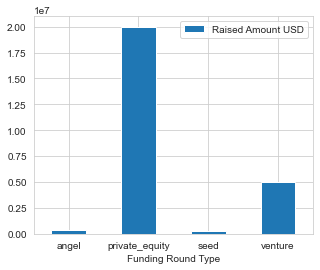

In [63]:
# Bar Plot for each funding type
fig, ax = plt.subplots(figsize=(5,4))
median_piv.plot(kind='bar', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('Funding Round Type')
ax.legend(['Raised Amount USD'])
plt.savefig('median_investment_funding_type_barplot.png')
plt.show()

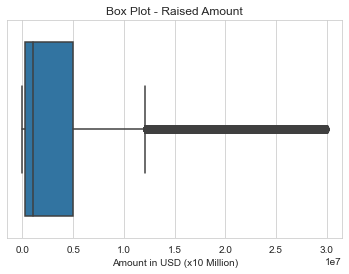

In [64]:
# Box Plot of raised_amount_usd after removing outliers
rounds2_df_outlier_removed = rounds2_df_treated[rounds2_df_treated.raised_amount_usd < rounds2_df_treated.raised_amount_usd.quantile(q=0.95)]
amount_box_plot = sns.boxplot(x = 'raised_amount_usd', data=rounds2_df_outlier_removed)
amount_box_plot.set(xlabel='Amount in USD (x10 Million)')
plt.title('Box Plot - Raised Amount')
plt.savefig('boxplot_outlier_removed_raised_amount_usd.png')
plt.show()

##### Analyzing funding data based on round code
We know that apart from funding round type, funding round code (Series A, B, C..) also influences the amount of investment received.  
It is known that 70% data is missing for round code, we just want to see if there is any pattern in the data which does exist  
To get a rough idea, 
- we will use the original dataset (rounds2), 
- to see median investments of each investment type, '
- further categorized by round code 

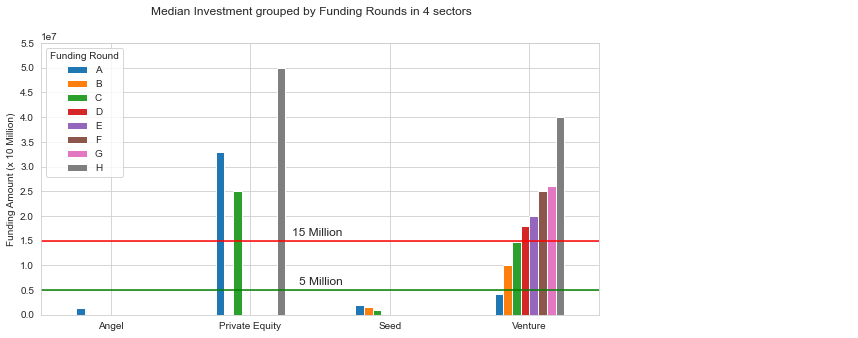

In [65]:
fig, ax1 = plt.subplots()
rounds2_funding_round_type = rounds2[rounds2['funding_round_type'].isin(required_investment_types)]
rounds2_funding_round_type.head()

median_piv_rounds2_df = rounds2_funding_round_type.pivot_table(
    index='funding_round_type',
    values='raised_amount_usd',
    columns='funding_round_code',
    aggfunc='median'
)
median_piv_rounds2_df.loc[:, :].plot(kind='bar', figsize=(10,5), legend=True, ax=ax1)
plt.suptitle('Median Investment grouped by Funding Rounds in 4 sectors')
ax1.set_ylabel('Funding Amount (x 10 Million)')
ax1.set_xlabel('')
ax1.set_xticklabels(['Angel', 'Private Equity', 'Seed', 'Venture'], rotation=0)
plt.yticks(np.arange(0, max(ax1.get_yticks()), 5000000))
plt.axhline(y=15000000, color='r', linestyle='-')
plt.axhline(y=5000000, color='g', linestyle='-')
plt.text(1.35, 6000000, '5 Million', fontsize = 12)
plt.text(1.3, 16000000, '15 Million', fontsize = 12)
ax1.legend(title='Funding Round')
ax1.annotate('15 Million', xy=(5, 5))

plt.savefig('median_investments_by_rounds_from_original_rounds_df.png')
plt.show()

##### Observation: We can see that Round B & and Round C median investments lie in the 5-15 million bracket set by Spark Funds

Combining the information from [outlier anlysis for raised amount usd](#raised_amount_usd_boxplot), & [Funding Analysis](#funding_analysis) we conclude that,
- `Median` is a better representative for this particular dataset.
- As per business requirement, (5-15 Million USD investment per round), `Venture Funding` is the most appropriate type of funding for Spark Funds

### Representative Values of Investments for Each of these Funding Types

| Description                                          | Value           |
|------------------------------------------------------|-----------------|
| Representative funding amount of venture type        | 5000000         |
| Representative funding amount of angel type          | 400000          |
| Representative funding amount of seed type           | 275000          |
| Representative funding amount of private equity type | 20000000        |
| Best Funding type for Range between 5-15 Million     | Venture Funding |


---

### Filtering data frame to only contain `Venture` funding

In [66]:
venture_fund = master_frame[master_frame.funding_round_type == 'venture']
venture_fund.head()

,permalink,funding_round_type,raised_amount_usd,category_list,country_code
0,/organization/-fame,venture,10000000.0,Media,IND
1,/organization/-qounter,venture,5000000.0,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,venture,3406878.0,Apps|Games|Mobile,USA
4,/organization/0-6-com,venture,2000000.0,Curated Web,CHN
5,/organization/004-technologies,venture,5000000.0,Software,USA


##### Since we have only picked venture funding type for futhere analysis, we can drop `funding_round_type` column from this data frame

In [67]:
venture_fund = venture_fund.drop('funding_round_type', axis=1)

In [68]:
venture_fund.head()

,permalink,raised_amount_usd,category_list,country_code
0,/organization/-fame,10000000.0,Media,IND
1,/organization/-qounter,5000000.0,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,3406878.0,Apps|Games|Mobile,USA
4,/organization/0-6-com,2000000.0,Curated Web,CHN
5,/organization/004-technologies,5000000.0,Software,USA


In [69]:
venture_fund.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55494 entries, 0 to 114946
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          55494 non-null  object 
 1   raised_amount_usd  55494 non-null  float64
 2   category_list      55494 non-null  object 
 3   country_code       55494 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.1+ MB


In [70]:
venture_fund.describe()

,raised_amount_usd
count,5.549400e+04
mean,1.110852e+07
std,8.217658e+07
min,0.000000e+00
25%,2.000000e+06
50%,5.000000e+06
75%,1.050000e+07
max,1.760000e+10


---

## Country Analysis

In [71]:
venture_fund.head()

,permalink,raised_amount_usd,category_list,country_code
0,/organization/-fame,10000000.0,Media,IND
1,/organization/-qounter,5000000.0,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,3406878.0,Apps|Games|Mobile,USA
4,/organization/0-6-com,2000000.0,Curated Web,CHN
5,/organization/004-technologies,5000000.0,Software,USA


### Countries which received the Highest Investment 
- Group by `country_code`
- Aggreate over `raised_amount_usd` to get Total Funding received by Country
- Sort Values from highest total funding to lowest

In [72]:
top_9_countries = venture_fund.groupby(['country_code'])['raised_amount_usd'].agg(['count', 'sum']).sort_values(by='sum', ascending=False)[0:9]
top_9_countries

,count,sum
country_code,,
USA,41247,4.629720e+11
CHN,2087,4.245042e+10
GBR,2303,2.148563e+10
IND,992,1.523186e+10
CAN,1346,1.003333e+10
FRA,985,7.599537e+09
DEU,786,7.486960e+09
ISR,910,7.477515e+09
JPN,318,3.583677e+09


##### Observation: The top 9 most heavily invested countries (in terms of Total Amount Invested) are USA, China, United Kingdom, India, Canada, France, Germany, Israel and Japan. 

We need to identify the top 3 English speaking countries so that Spark Funds can communicate with companies easily.  
As per [this reference](https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language), we can add a column to identify English Speaking countryies.

In [73]:
top_9_countries['English'] = [True, False, True, True, True, False, False, True,  False]

In [74]:
top_9_countries

,count,sum,English
country_code,,,
USA,41247,4.629720e+11,True
CHN,2087,4.245042e+10,False
GBR,2303,2.148563e+10,True
IND,992,1.523186e+10,True
CAN,1346,1.003333e+10,True
FRA,985,7.599537e+09,False
DEU,786,7.486960e+09,False
ISR,910,7.477515e+09,True
JPN,318,3.583677e+09,False


In [75]:
top_9_countries[top_9_countries['English'] == True]

,count,sum,English
country_code,,,
USA,41247,4.629720e+11,True
GBR,2303,2.148563e+10,True
IND,992,1.523186e+10,True
CAN,1346,1.003333e+10,True
ISR,910,7.477515e+09,True


### Plot - Total Investment in Country

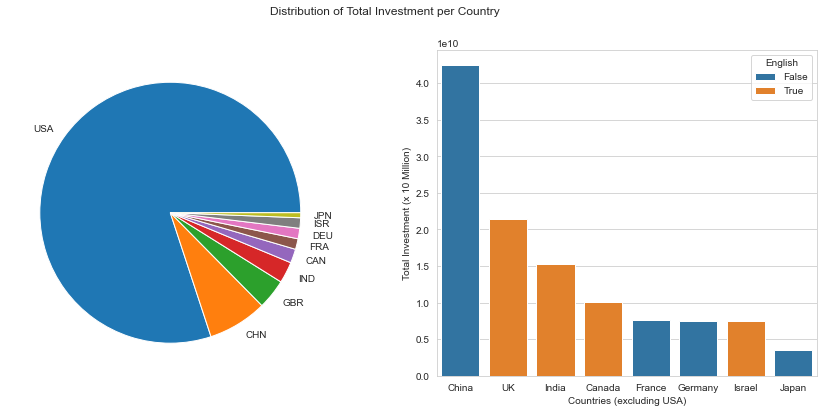

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

plt.suptitle('Distribution of Total Investment per Country')
top_9_countries['sum'].plot(kind='pie', ax=ax1)
ax2 = sns.barplot(x='country_code', y='sum', hue='English', data=top_9_countries[1:].reset_index(), dodge=False)
ax1.set_ylabel('')
ax2.set_xlabel('Countries (excluding USA)')
ax2.set_xticklabels(['China', 'UK', 'India', 'Canada', 'France', 'Germany', 'Israel', 'Japan'])
ax2.set_ylabel('Total Investment (x 10 Million)')
fig.savefig('total_investment_distribution.png')
plt.show()

In [77]:
top3_countries = top_9_countries[top_9_countries['English'] == True][:3].index.tolist()
top3_countries

['USA', 'GBR', 'IND']

##### Observation: The top3 English Speaking countries based on highest total investment amount are
- United States of America (USA)
- United Kingdom (UK)
- India (IND)

#### Analysing the Top 3 English-Speaking Countries

| Description                     | Value |
|---------------------------------|-------|
| Top English speaking country    | USA   |
| Second English speaking country | UK    |
| Third English speaking country  | IND   |


---

### Mapping Primary Category to Main Sector

##### Loading and understanding the mapping dataset

In [78]:
mapping = pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [79]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [80]:
# checking if multiple sectors belong to a category
any(mapping.sum(axis=1) > 1)

False

In [81]:
# checking if there are any rows where no column has true value
sum(mapping.sum(axis=1))

688

From the dataset, we can see that
- Each sector has one category
- If a category belongs to a main sector, the cell value is set to 1 Else it is set to 0  
- The data is in Wide Format [see #6](https://discuss.analyticsvidhya.com/t/difference-between-wide-and-long-data-format/8110)

Since we need to map the categories to respective sectors, we can convert it to long format and only keep entries where the value is one.

In [82]:
# Extracting value & id list
value_vars = list(mapping.columns[1:])
id_vars = list(np.setdiff1d(mapping.columns, value_vars))

# print(value_vars, ':', id_vars)

# using pd.melt to convert from wide to long format (see #7)
category_sector_mapping = pd.melt(mapping, id_vars = id_vars, value_vars=value_vars)

In [83]:
category_sector_mapping.head(9)

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
5,Active Lifestyle,Automotive & Sports,0
6,Ad Targeting,Automotive & Sports,0
7,Advanced Materials,Automotive & Sports,0
8,Adventure Travel,Automotive & Sports,1


In [84]:
# keeping only those entries where value is one
category_sector_mapping = category_sector_mapping[category_sector_mapping.value == 1]

In [85]:
category_sector_mapping.head()

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [86]:
# dropping value column
category_sector_mapping.drop('value', axis=1, inplace=True)
category_sector_mapping.head()

,category_list,variable
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [87]:
category_sector_mapping.rename(columns={'variable': 'sector'}, inplace=True)

In [88]:
category_sector_mapping.head()

,category_list,sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


##### Sectors have been mapped to respective Category

In [89]:
venture_fund.head()

,permalink,raised_amount_usd,category_list,country_code
0,/organization/-fame,10000000.0,Media,IND
1,/organization/-qounter,5000000.0,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,3406878.0,Apps|Games|Mobile,USA
4,/organization/0-6-com,2000000.0,Curated Web,CHN
5,/organization/004-technologies,5000000.0,Software,USA


##### Normalizing category_list
We can see that our funding dataset contains a category_list which has multiple categories in it separated by `|`.  
As per the business rule given by Spark Funds, we will only keep the primary category. 

In [90]:
venture_fund.category_list = venture_fund.category_list.apply(lambda x: str(x).lower().split('|')[0])
venture_fund.head()

,permalink,raised_amount_usd,category_list,country_code
0,/organization/-fame,10000000.0,media,IND
1,/organization/-qounter,5000000.0,application platforms,USA
3,/organization/-the-one-of-them-inc-,3406878.0,apps,USA
4,/organization/0-6-com,2000000.0,curated web,CHN
5,/organization/004-technologies,5000000.0,software,USA


In [91]:
category_sector_mapping.category_list = category_sector_mapping.category_list.apply(lambda x: str(x).lower())

In [92]:
category_sector_mapping.head()

,category_list,sector
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports
46,automated kiosk,Automotive & Sports
47,automotive,Automotive & Sports


In [93]:
set(category_sector_mapping.category_list) - set(venture_fund.category_list)

{'0notechnology',
 '0tural language processing',
 '0tural resources',
 '0vigation',
 'a0lytics',
 'alter0tive medicine',
 'aquaculture',
 'big data a0lytics',
 'biomass power generation',
 'boating industry',
 'building owners',
 'business a0lytics',
 'can0bis',
 'career ma0gement',
 'casual games',
 'charities',
 'chi0 internet',
 'cloud ma0gement',
 'contact ma0gement',
 'digital rights ma0gement',
 'digital sig0ge',
 'direct advertising',
 'document ma0gement',
 'educatio0l games',
 'email newsletters',
 'energy ma0gement',
 'energy storage',
 'event ma0gement',
 'farmers market',
 'fi0nce',
 'fi0nce technology',
 'fi0ncial exchanges',
 'fi0ncial services',
 'field support services',
 'film distribution',
 'flash sales',
 'fleet ma0gement',
 'flowers',
 'fmcg',
 'forums',
 'fuel cells',
 'funeral industry',
 'gay & lesbian',
 'gover0nce',
 'green',
 'group buying',
 'handmade',
 'hedge funds',
 'homeless shelter',
 'ict',
 'identity ma0gement',
 'impact investing',
 'indians',
 'inn

We can see that there is some problem in category_list column of the mappings dataset.
- the character `na` seems to have been replaced by `0`

In [94]:
category_sector_mapping[category_sector_mapping.category_list.str.contains('0')]

,category_list,sector
1616,energy ma0gement,Cleantech / Semiconductors
1847,0notechnology,Cleantech / Semiconductors
1848,0tural language processing,Cleantech / Semiconductors
1849,0tural resources,Cleantech / Semiconductors
2048,waste ma0gement,Cleantech / Semiconductors
2262,digital rights ma0gement,Entertainment
2263,digital sig0ge,Entertainment
2287,educatio0l games,Entertainment
2320,event ma0gement,Entertainment
2772,alter0tive medicine,Health


We can fix this problem by changing all `0`s back to `na`, except for the entry where the number is valid i.e Enterprise 2.0

In [95]:
category_sector_mapping.category_list = category_sector_mapping.category_list.apply(lambda x: str(x).replace("0", 'na') if ('enterprise' not in str(x)) else x)
category_sector_mapping.head()

,category_list,sector
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports
46,automated kiosk,Automotive & Sports
47,automotive,Automotive & Sports


In [96]:
# checking how many category list values cannot be mapped. 
set(venture_fund.category_list) - set(category_sector_mapping.category_list)

{'adaptive equipment',
 'biotechnology and semiconductor',
 'english-speaking',
 'enterprise hardware',
 'greentech',
 'natural gas uses',
 'nightlife',
 'product search',
 'racing',
 'rapidly expanding',
 'retirement',
 'specialty retail'}

##### Categoy List has been cleaned and normalized in both the dataframes. 
### Merging mapping data to venture fund data further analysis

In [97]:
category_sector_df = pd.merge(venture_fund, category_sector_mapping, on='category_list')

In [98]:
category_sector_df.head()

,permalink,raised_amount_usd,category_list,country_code,sector
0,/organization/-fame,10000000.0,media,IND,Entertainment
1,/organization/90min,15000000.0,media,GBR,Entertainment
2,/organization/90min,5800000.0,media,GBR,Entertainment
3,/organization/90min,18000000.0,media,GBR,Entertainment
4,/organization/all-def-digital,5000000.0,media,USA,Entertainment


In [99]:
category_sector_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55480 entries, 0 to 55479
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          55480 non-null  object 
 1   raised_amount_usd  55480 non-null  float64
 2   category_list      55480 non-null  object 
 3   country_code       55480 non-null  object 
 4   sector             55480 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.5+ MB


In [100]:
venture_fund.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55494 entries, 0 to 114946
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          55494 non-null  object 
 1   raised_amount_usd  55494 non-null  float64
 2   category_list      55494 non-null  object 
 3   country_code       55494 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.1+ MB


In [101]:
len(venture_fund) - len(category_sector_df)

14

##### Observation: We lost 14 values due to merge (~0.02%)

In [102]:
# checking if any sector is missing
any(category_sector_df.sector.isnull())

False

---

## Sector Analysis

In [103]:
top3_countries_sectors = category_sector_df[category_sector_df.country_code.isin(top3_countries)]

In [104]:
top3_countries_sectors.head()

,permalink,raised_amount_usd,category_list,country_code,sector
0,/organization/-fame,10000000.0,media,IND,Entertainment
1,/organization/90min,15000000.0,media,GBR,Entertainment
2,/organization/90min,5800000.0,media,GBR,Entertainment
3,/organization/90min,18000000.0,media,GBR,Entertainment
4,/organization/all-def-digital,5000000.0,media,USA,Entertainment


In [105]:
top3_countries_filtered = top3_countries_sectors[(top3_countries_sectors.raised_amount_usd <= 15000000) & (top3_countries_sectors.raised_amount_usd >= 5000000)]

In [106]:
top3_countries_filtered.head()

,permalink,raised_amount_usd,category_list,country_code,sector
0,/organization/-fame,10000000.0,media,IND,Entertainment
1,/organization/90min,15000000.0,media,GBR,Entertainment
2,/organization/90min,5800000.0,media,GBR,Entertainment
4,/organization/all-def-digital,5000000.0,media,USA,Entertainment
16,/organization/chefs-feed,5000000.0,media,USA,Entertainment


### Understand the data for the Top 3 Countries

In [107]:
ind_df = top3_countries_filtered[top3_countries_filtered['country_code'] == "IND"]
us_df = top3_countries_filtered[top3_countries_filtered['country_code'] == "USA"]
uk_df = top3_countries_filtered[top3_countries_filtered['country_code'] == "GBR"]

In [108]:
ind_df.head()

,permalink,raised_amount_usd,category_list,country_code,sector
0,/organization/-fame,10000000.0,media,IND,Entertainment
243,/organization/birds-eye-systems,5000000.0,apps,IND,"News, Search and Messaging"
250,/organization/bobble-app,5000000.0,apps,IND,"News, Search and Messaging"
279,/organization/chillr-2,6000000.0,apps,IND,"News, Search and Messaging"
415,/organization/innoz,5000000.0,apps,IND,"News, Search and Messaging"


In [109]:
ind_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 55378
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          498 non-null    object 
 1   raised_amount_usd  498 non-null    float64
 2   category_list      498 non-null    object 
 3   country_code       498 non-null    object 
 4   sector             498 non-null    object 
dtypes: float64(1), object(4)
memory usage: 23.3+ KB


In [110]:
us_df.head()

,permalink,raised_amount_usd,category_list,country_code,sector
4,/organization/all-def-digital,5000000.0,media,USA,Entertainment
16,/organization/chefs-feed,5000000.0,media,USA,Entertainment
25,/organization/huffingtonpost,5000000.0,media,USA,Entertainment
26,/organization/huffingtonpost,5000000.0,media,USA,Entertainment
36,/organization/matchmine,10000000.0,media,USA,Entertainment


In [111]:
us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15843 entries, 4 to 55473
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          15843 non-null  object 
 1   raised_amount_usd  15843 non-null  float64
 2   category_list      15843 non-null  object 
 3   country_code       15843 non-null  object 
 4   sector             15843 non-null  object 
dtypes: float64(1), object(4)
memory usage: 742.6+ KB


In [112]:
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 1 to 55466
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          876 non-null    object 
 1   raised_amount_usd  876 non-null    float64
 2   category_list      876 non-null    object 
 3   country_code       876 non-null    object 
 4   sector             876 non-null    object 
dtypes: float64(1), object(4)
memory usage: 41.1+ KB


In [113]:
uk_df.head()

,permalink,raised_amount_usd,category_list,country_code,sector
1,/organization/90min,15000000.0,media,GBR,Entertainment
2,/organization/90min,5800000.0,media,GBR,Entertainment
102,/organization/common-interest-communities,10000000.0,application platforms,GBR,"News, Search and Messaging"
118,/organization/geospock-ltd-,5460000.0,application platforms,GBR,"News, Search and Messaging"
119,/organization/geospock-ltd-,5400000.0,application platforms,GBR,"News, Search and Messaging"


In [114]:
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 1 to 55466
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          876 non-null    object 
 1   raised_amount_usd  876 non-null    float64
 2   category_list      876 non-null    object 
 3   country_code       876 non-null    object 
 4   sector             876 non-null    object 
dtypes: float64(1), object(4)
memory usage: 41.1+ KB


In [115]:
us_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15843 entries, 4 to 55473
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          15843 non-null  object 
 1   raised_amount_usd  15843 non-null  float64
 2   category_list      15843 non-null  object 
 3   country_code       15843 non-null  object 
 4   sector             15843 non-null  object 
dtypes: float64(1), object(4)
memory usage: 742.6+ KB


### Calculating Total Invested Amount in each country

In [116]:
us_df.raised_amount_usd.sum()

129657400937.0

In [117]:
uk_df.raised_amount_usd.sum()

6676843539.0

In [118]:
ind_df.raised_amount_usd.sum()

3816543602.0

In [119]:
top3_countries_piv = top3_countries_filtered.pivot_table(
    index='sector',
    values='raised_amount_usd',
    aggfunc='count',
    columns='country_code'
)

In [120]:
top3_countries_piv

country_code,GBR,IND,USA
sector,,,
Automotive & Sports,26,14,256
Cleantech / Semiconductors,154,29,2745
Entertainment,80,47,842
Health,32,33,1123
Manufacturing,52,30,1076
"News, Search and Messaging",97,76,2025
Others,242,163,4285
"Social, Finance, Analytics, Advertising",193,106,3491


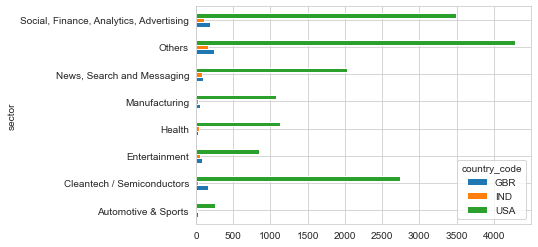

In [121]:
top3_countries_piv.plot(kind='barh')
plt.show()

Since the total count is very high for USA, it is difficult to understand the graph properly.  
We need to analyze which sector is more active in which country, so we can generate percentage distribution of sector for each country. 

In [122]:
top3_countries_piv['India'] = round(top3_countries_piv['IND']/sum(top3_countries_piv['IND'])*100, 2)
top3_countries_piv['United States of America'] = round(top3_countries_piv['USA']/sum(top3_countries_piv['USA'])*100, 2)
top3_countries_piv['United Kingdom'] = round(top3_countries_piv['GBR']/sum(top3_countries_piv['GBR'])*100, 2)

In [123]:
top3_sectors_in_countries_percent = top3_countries_piv.sort_values('India', ascending=False)[['India', 'United States of America', 'United Kingdom']]

### Plotting the Sector Wise Distribution of Companies in the Top 3 English speaking countries

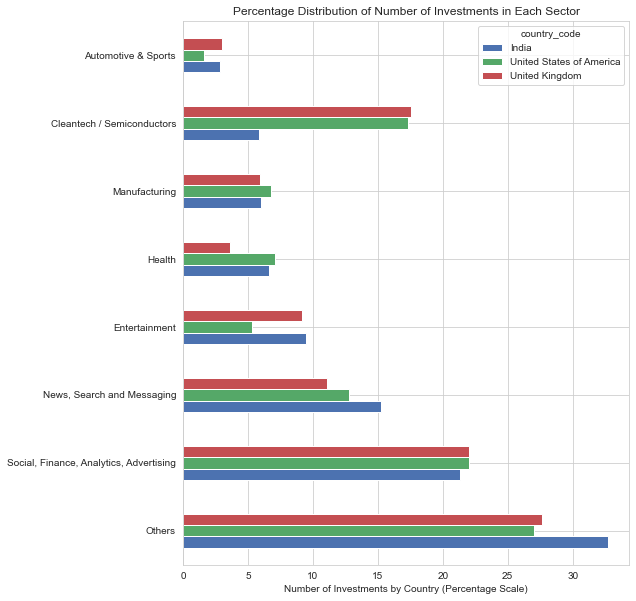

In [124]:
plt.style.use('seaborn-deep')
fig, ax = plt.subplots(figsize=(8,10))
top3_sectors_in_countries_percent.plot(kind='barh', ax=ax)
ax.set_xlabel('Number of Investments by Country (Percentage Scale)')
ax.set_ylabel('')
# ax.legend(title='Country Code')
ax.set_title('Percentage Distribution of Number of Investments in Each Sector')
fig.savefig('investment_by_country1.png', bbox_inches='tight')
plt.show()

In [125]:
top3_countries_piv.sort_values('USA', ascending=False)

country_code,GBR,IND,USA,India,United States of America,United Kingdom
sector,,,,,,
Others,242,163,4285,32.73,27.05,27.63
"Social, Finance, Analytics, Advertising",193,106,3491,21.29,22.03,22.03
Cleantech / Semiconductors,154,29,2745,5.82,17.33,17.58
"News, Search and Messaging",97,76,2025,15.26,12.78,11.07
Health,32,33,1123,6.63,7.09,3.65
Manufacturing,52,30,1076,6.02,6.79,5.94
Entertainment,80,47,842,9.44,5.31,9.13
Automotive & Sports,26,14,256,2.81,1.62,2.97


In [126]:
# Sorted by Total Invest - US
us_df.pivot_table(
    index='permalink',
    values='raised_amount_usd',
    aggfunc='sum'
).sort_values(
    by='raised_amount_usd',
    ascending=False
)[0:3]

,raised_amount_usd
permalink,
/organization/quellan,82000000.0
/organization/airspan-networks,81769000.0
/organization/biodesix,75300000.0


In [127]:
# Sorted by Total Invest - UK
uk_df.pivot_table(
    index='permalink',
    values='raised_amount_usd',
    aggfunc='sum'
).sort_values(
    by='raised_amount_usd',
    ascending=False
)[0:3]

,raised_amount_usd
permalink,
/organization/greenroad-technologies,52500000.0
/organization/mysupermarket,43400000.0
/organization/zopa,37900000.0


In [128]:
# Sorted by Total Invesment Amount - IND
ind_df.pivot_table(
    index='permalink',
    values='raised_amount_usd',
    aggfunc='sum'
).sort_values(
    by='raised_amount_usd',
    ascending=False
)[0:3]

,raised_amount_usd
permalink,
/organization/azure-power,57200000.0
/organization/manthan-systems,50700000.0
/organization/firstcry-com,39000000.0


In [129]:
# Sorted by Total Count - IND
ind_df.pivot_table(
    index='permalink',
    values='raised_amount_usd',
    aggfunc='count'
).sort_values(
    by='raised_amount_usd',
    ascending=False
)[0:3]

,raised_amount_usd
permalink,
/organization/azure-power,6
/organization/manthan-systems,4
/organization/myntra,4


In [130]:
# sanity check
ind_df[ind_df['permalink'] ==  '/organization/myntra'].raised_amount_usd.sum() - ind_df[ind_df['permalink'] ==  '/organization/firstcry-com'].raised_amount_usd.sum()

-1000000.0

In [131]:
# sanity check
us_df[us_df.permalink == '/organization/quellan'].raised_amount_usd.sum() - us_df[us_df.permalink == '/organization/virtustream'].raised_amount_usd.sum()

17700000.0

---

# Conclusion

- Spark Funds can become a Venture Fund Investor
- It can invest in USA, UK & India
- In USA, it can invest in `Others`, `Cleanteach/Semiconductors` & `Social, Finance, Analytics, Advertising` sectors
- In UK, it can invest in `Others`, `Cleanteach/Semiconductors` & `Social, Finance, Analytics, Advertising` sectors
- In UK, it can invest in `Others`, `Social, Finance, Analytics, Advertising` & `News, Search and Messaging` sectors

Note: We have choen `Others` as one of the sectors since it was mentioned that this is one of the 8 sectors that can be analyzed.
However, we should dig deeper and figure what prominent sub-sectors/categories can be identified after discussing the findings thoroughly with Spark Fund

# References
`#1` - https://stackoverflow.com/a/24047916  
`#2` - https://stackoverflow.com/a/42789818/7048915  
`#3` - https://stackoverflow.com/a/11531402/7048915  
`#4` - https://stackoverflow.com/a/56744855/7048915  
`#5` - https://www.reddit.com/r/learnpython/comments/3cjnpg/seaborn_xaxis_as_index/cuuo79q?utm_source=share&utm_medium=web2x&context=3  
`#6` - https://discuss.analyticsvidhya.com/t/difference-between-wide-and-long-data-format/8110  
`#7` - https://pandas.pydata.org/docs/reference/api/pandas.melt.html
---
- https://stackabuse.com/change-tick-frequency-in-matplotlib
- https://stackoverflow.com/a/33382750/7048915
- https://github.com/mwaskom/seaborn/issues/871#issuecomment-399701820
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_title.html
- https://stackoverflow.com/a/7125157/7048915
- https://www.geeksforgeeks.org/how-to-drop-rows-in-pandas-dataframe-by-index-labels/
- https://stackoverflow.com/questions/44723377/pandas-combining-two-dataframes-horizontally
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html